## Multiple linear regression

In [80]:
# Reading and understanding the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api  as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
ls

Housing.csv
Multiple+Linear+Regression+-+Housing+Case+Study.ipynb
Untitled.ipynb


In [82]:
housing_data = pd.read_csv("Housing.csv")

In [83]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [84]:
housing_data.shape

(545, 13)

In [85]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              544 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [86]:
housing_data.isnull().sum()

price               0
area                1
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [87]:
housing_data['area'] = housing_data['area'].replace(np.nan, 8100)

In [88]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


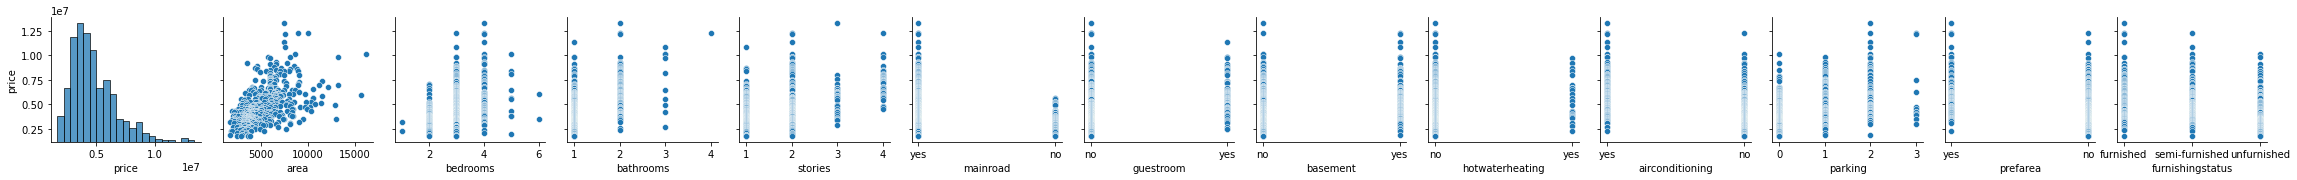

In [89]:
# Visualization of data numerical variable
sns.pairplot(x_vars=housing_data.columns,y_vars='price',data=housing_data)

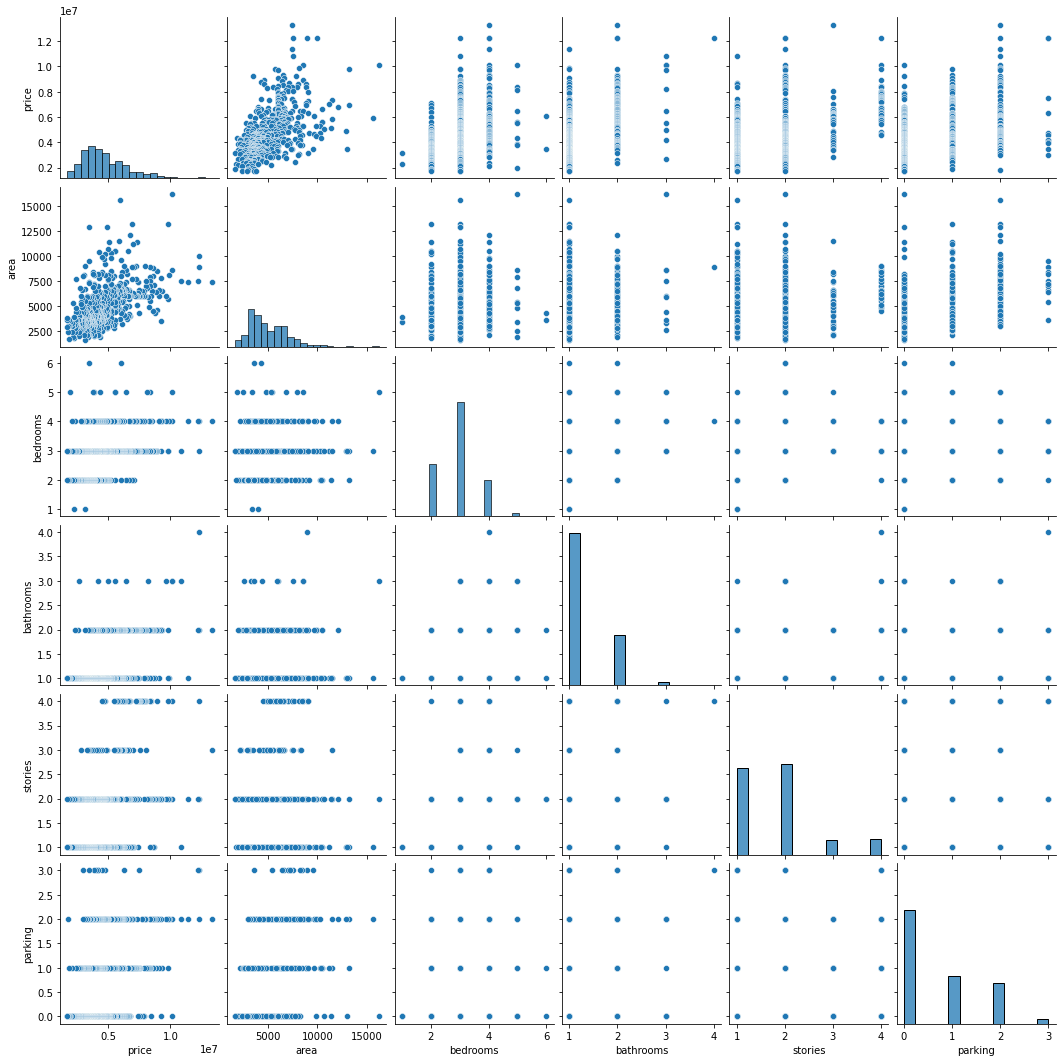

In [90]:
# Visualization of all numerical variables 
sns.pairplot(housing_data)

In [91]:
# Visualization of categorical variable

In [92]:
# All categorical variable
housing_data_categorical = housing_data.columns[housing_data.dtypes == 'object']
housing_data_categorical

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

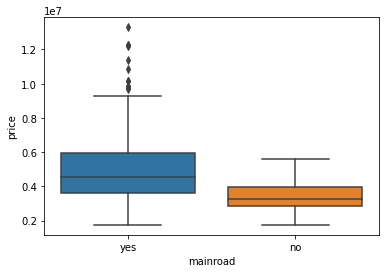

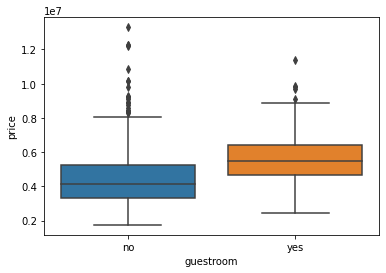

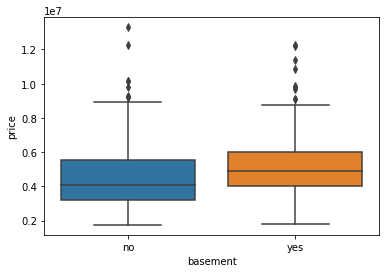

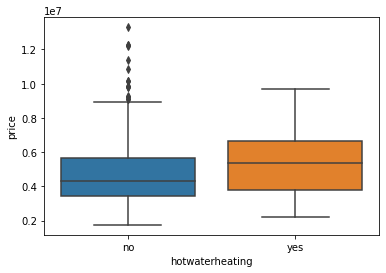

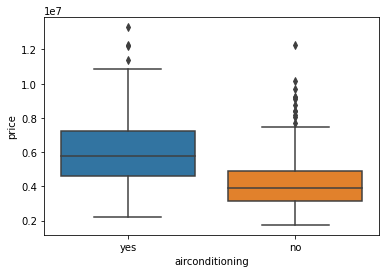

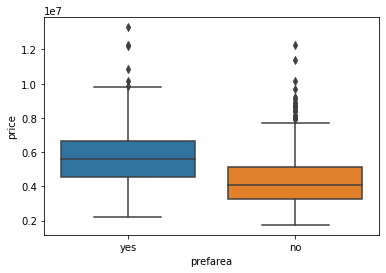

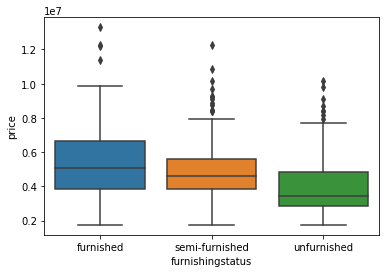

In [93]:
# plt.figure(figsize=(5,4))
for housing_category in housing_data_categorical:
    sns.boxplot(x=housing_category, y='price', data=housing_data)
    plt.show()

In [94]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [95]:
# Changing yes to 1 and no to 0 in some datapoint given in above sheet.
housing_column = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for hou in housing_column:
    print("Attribute {}".format(hou))
    print(housing_data[hou].value_counts())
    print("\n\n *******")
    housing_data[hou] = housing_data[hou].apply(lambda x: 0 if x=='no' else 1)
housing_data

Attribute mainroad
yes    468
no      77
Name: mainroad, dtype: int64


 *******
Attribute guestroom
no     448
yes     97
Name: guestroom, dtype: int64


 *******
Attribute basement
no     354
yes    191
Name: basement, dtype: int64


 *******
Attribute hotwaterheating
no     520
yes     25
Name: hotwaterheating, dtype: int64


 *******
Attribute airconditioning
no     373
yes    172
Name: airconditioning, dtype: int64


 *******
Attribute prefarea
no     417
yes    128
Name: prefarea, dtype: int64


 *******


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960.0,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960.0,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500.0,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420.0,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.0,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400.0,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620.0,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910.0,3,1,1,0,0,0,0,0,0,0,furnished


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [96]:
# Now convert furnishingstatus to binary value of 0|1 using dummy variable
status = pd.get_dummies(housing_data['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [97]:
housing_data = pd.concat([housing_data , status],axis=1)
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960.0,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960.0,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500.0,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420.0,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.0,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400.0,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620.0,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910.0,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [98]:
housing_data=housing_data.drop(['furnishingstatus'],axis=1)

In [99]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960.0,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960.0,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500.0,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420.0,4,1,2,1,1,1,0,1,2,0,0,0


## Train test split

In [100]:
df_train,df_test=train_test_split(housing_data,train_size=.70,test_size=.30,random_state=100)

In [101]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### Rescale Features using MinMaxScaling technique

In [102]:
# MinMax is normalisation technique formulation is (x-xmin)/(xmin-xmax)
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
#1. Instantiate an object
scaler = MinMaxScaler()
# Transform or fit on data
# Fit are of type "fit" , "fit_transform","transform"
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


## Training the model

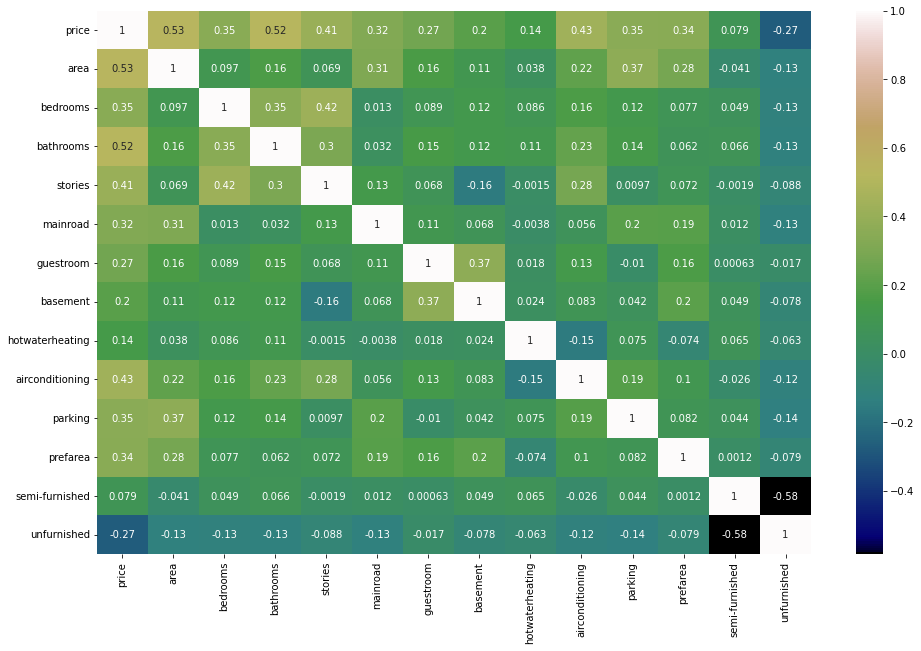

In [103]:
# Demonstrate Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr() , annot=True , cmap="gist_earth")
plt.show()

In [104]:
df_train.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0


In [105]:
# X_train , y_train
y_train = df_train.pop('price')
X_train = df_train

In [106]:
X_train.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
267,0.271383,0.4,0.0,0.333333,1,0,0,0,0,0.333333,0,1,0
263,0.187610,0.4,0.0,0.333333,0,0,0,0,0,0.000000,0,1,0
433,0.144667,0.6,0.0,0.333333,0,0,0,0,0,0.333333,0,1,0
217,0.442274,0.4,0.0,0.333333,1,0,0,0,1,0.666667,1,0,0
154,0.159627,0.4,0.5,0.333333,1,0,0,0,0,0.666667,0,1,0


In [107]:
y_train.head(10)

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
267    0.229697
263    0.230303
433    0.133333
217    0.266667
154    0.327273
Name: price, dtype: float64

## 1

In [108]:
# Add a constant
# will use area as a predictor variable 
X_train_sm = sm.add_constant(X_train['area'])

#create a first model
lr = sm.OLS(y_train , X_train_sm)

lr_model = lr.fit()

lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [109]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           3.15e-29
Time:                        22:02:01   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2

In [110]:
# add another variable bathroom
# Add a constant
# will use area as a predictor variable 
X_train_sm = X_train[['area','bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)

#create a first model
lr = sm.OLS(y_train , X_train_sm)

lr_model = lr.fit()

lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [111]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           2.51e-54
Time:                        22:02:01   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3

In [112]:
# Adding another variable that is hotwaterheating
# add another variable bathroom
# Add a constant
# will use area as a predictor variable 
X_train_sm = X_train[['area','hotwaterheating']]
X_train_sm = sm.add_constant(X_train_sm)

#create a first model
lr = sm.OLS(y_train , X_train_sm)

lr_model = lr.fit()

lr_model.params

const              0.123547
area               0.458217
hotwaterheating    0.085614
dtype: float64

In [113]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     80.13
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           9.72e-30
Time:                        22:02:02   Log-Likelihood:                 231.17
No. Observations:                 381   AIC:                            -456.3
Df Residuals:                     378   BIC:                            -444.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1235      0.013      9.638      0.000       0.098       0.149
area                0.4582      0.037     12.228      0.000       0.385       0.532
hotwaterheating     0.0856      0.030      2.812      0.005       0.026       0.145
==============================================================================
Omnibus:                       66.067   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.233
Skew:                           0.906   Prob(JB):                     2.15e-31
Kurtosis:                       5.369   Cond. No.                         6.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4

In [114]:
# Adding another variable that is bedrooms
# add another variable bathroom
# Add a constant
# will use area as a predictor variable 
X_train_sm = X_train[['area','bedrooms','bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)

#create a first model
lr = sm.OLS(y_train , X_train_sm)

lr_model = lr.fit()

lr_model.params

const        0.041352
area         0.392211
bedrooms     0.181863
bathrooms    0.259978
dtype: float64

In [115]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           3.12e-57
Time:                        22:02:02   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Building the model with all the variables

In [116]:
X_train_sm = sm.add_constant(X_train)
#create a first model
lr = sm.OLS(y_train , X_train_sm)

lr_model = lr.fit()

lr_model.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [117]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           8.83e-83
Time:                        22:02:02   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67
